<a href="https://colab.research.google.com/github/dannyasd/MineriaDeDatos/blob/main/Lectura7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura 7: Agrupamiento
## Aplicaciones de Minería de Datos I

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Cargar el conjunto de datos
dataset = pd.read_csv('https://alhernandezsua.gitlab.io/amd-misti/datasets/dataset_malwares.csv',sep=',')
dataset = dataset.drop(columns=['Name'])

In [3]:
dataset.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


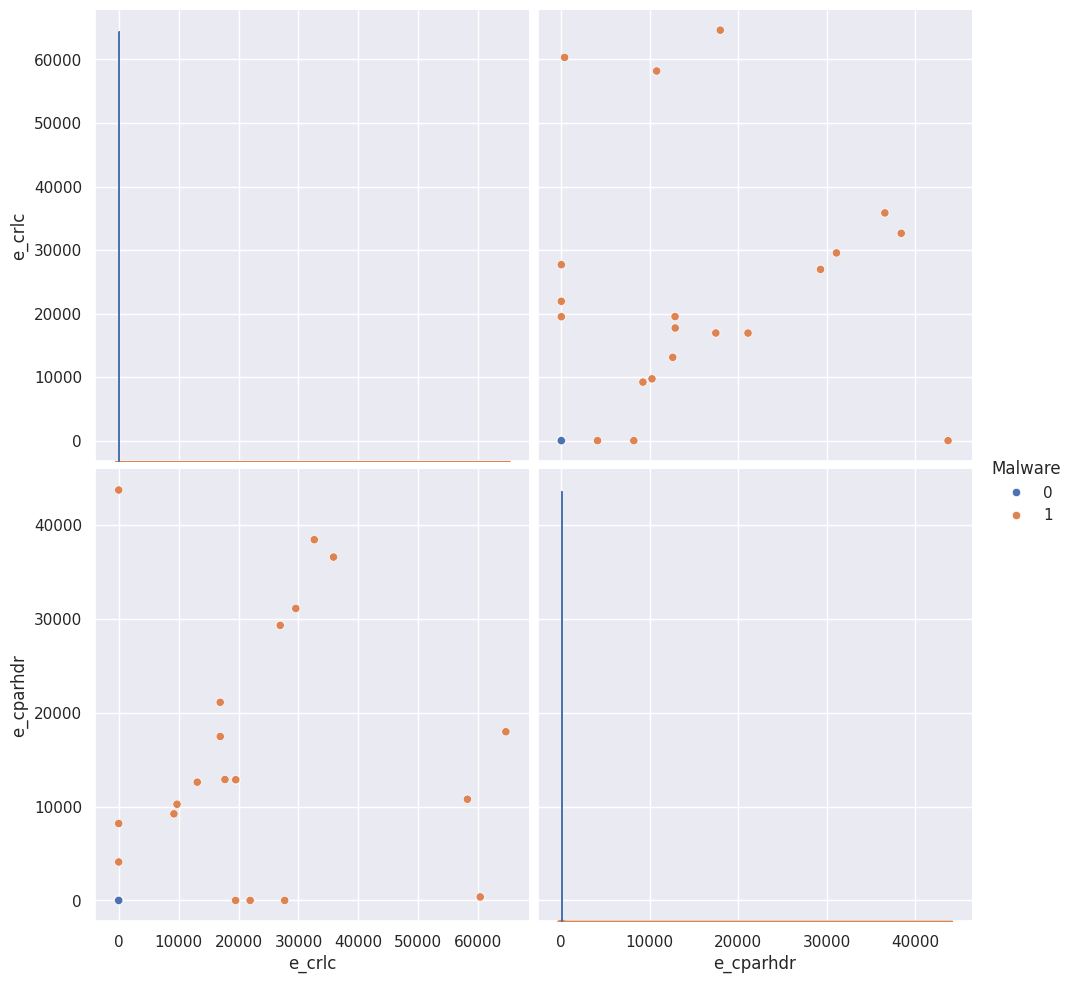

In [4]:
#Genrar un conjunto de todos los datos
sns.set()
#Seleccionar columnas
columnas = ['e_crlc','e_cparhdr','Malware']
# Agrupar
sns.pairplot(dataset[columnas],size=5,hue='Malware')

## Algoritmo K-means

In [5]:
#Algoritmo de agrupamiento
from sklearn.cluster import KMeans
#Biblioteca matplotlib de gráficos
from matplotlib import pyplot as plt

In [6]:
#Conjunto de muestras no etiquetadas
X_malware = dataset.drop(columns=['Malware'])
sc = StandardScaler()
X_malware_sc = sc.fit_transform(X_malware.values)
X_malware_sc_df = pd.DataFrame(X_malware_sc,columns=X_malware.columns)

In [7]:
#Entrenamiento del algoritmo
kmeans = KMeans(n_clusters=2)
#Agrupar las muestras
grupos = kmeans.fit_predict(X_malware_sc)
#centroides
centroides = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


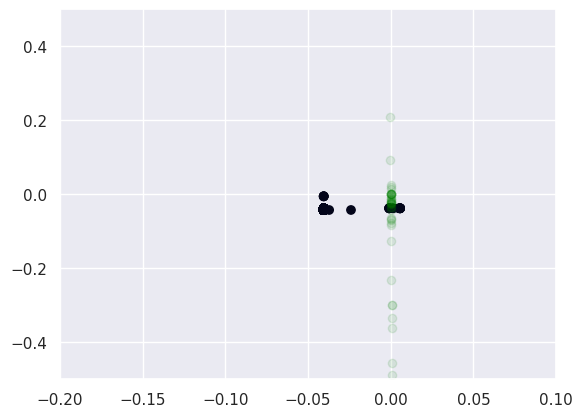

In [8]:
#gráfico de dispersión
plt.scatter(X_malware_sc_df['e_crlc'],X_malware_sc_df['e_cparhdr'],c=grupos)
#plt.scatter(X['SectionMaxPointerData'],X['SectionMaxPointerData'],c=grupos)
plt.scatter(centroides[0],centroides[1],c='green',alpha=0.1)
# Ajustar los límites del eje x e y
plt.xlim(-0.2, 0.1)  # Establecer límites para el eje X
plt.ylim(-0.5, 0.5)  # Establecer límites para el eje Y
plt.show()

<p>Observa que muchos de los grupos formados no son perceptibles ni distinguibles. Esto se debe a la variabilidad de los datos. Una de las técnicas para descartar características con excesivo ruido o variabilidad consiste en el análisis de los <b>umbrales de variabilidad</b>.</p>

In [9]:
# Calcular la varianza de cada característica
varianzas = X_malware_sc_df.var()
# Establecer un umbral de varianza
umbral_min = varianzas.mean() - varianzas.std()  # Varianza mínima deseada
umbral_max = varianzas.mean() + varianzas.std()  # Varianza máxima deseada

In [10]:
# Identificar características con varianza dentro del rango deseado
columnas_a_mantener = varianzas[(varianzas >= umbral_min) & (varianzas <= umbral_max)].index
# Filtrar el DataFrame para mantener solo estas columnas
X_malware_filtrado =  X_malware_sc_df[columnas_a_mantener]

In [11]:
# Entrenar un árbol de decisión
y_malware = dataset['Malware'].values
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_malware_filtrado, y_malware)

# Obtener importancias de las características
catacteristicas_importantes = dt.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
catacteristicas = X_malware_filtrado.columns
importancia_df = pd.DataFrame({'Cracteristica': catacteristicas, 'Importancia': catacteristicas_importantes})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)
print(importancia_df)

            Cracteristica  Importancia
38  MajorSubsystemVersion     0.571151
43              Subsystem     0.149567
24     MajorLinkerVersion     0.132784
18          TimeDateStamp     0.063611
41               CheckSum     0.013003
..                    ...          ...
12                 e_ovno     0.000000
6                    e_ss     0.000000
5              e_maxalloc     0.000000
4              e_minalloc     0.000000
0                  e_cblp     0.000000

[69 rows x 2 columns]


<p>Se puede determinar cuáles son las características más representativas empleando un árbol de decisión, lo cual facilita la visualización en dos dimensiones de los resultados del agrupamiento.</p>








/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


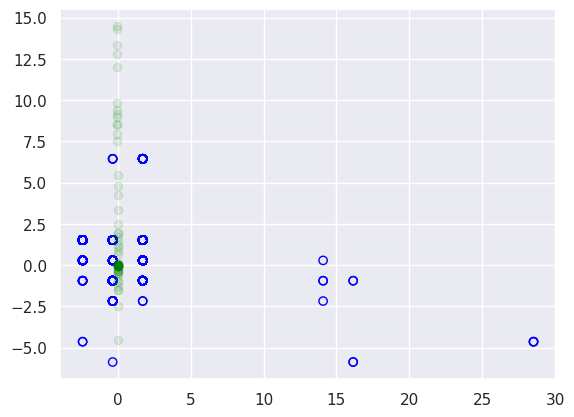

In [12]:
### means
kmeans = KMeans(n_clusters=2)
grupos = kmeans.fit_predict(X_malware_filtrado.values)
centroides = kmeans.cluster_centers_
#gráfico de dispersión
plt.scatter(X_malware_filtrado['Subsystem'],X_malware_filtrado['MajorSubsystemVersion'],facecolors='none',edgecolors='blue')
plt.scatter(centroides[0],centroides[1],c='green',alpha=0.1)
# Ajustar los límites del eje x e y
plt.show()

# Dataset de muestra

In [13]:
#sklearn.datasets contiene muchos conjuntos de datos de prueba
#make_blobs genera un conjunto de datos de n dimensiones sin etiquetas||
from sklearn.datasets import make_blobs

In [14]:
#genera 300 muestras y 3 posibles grupos
X,y = make_blobs(n_samples=300,centers=3)

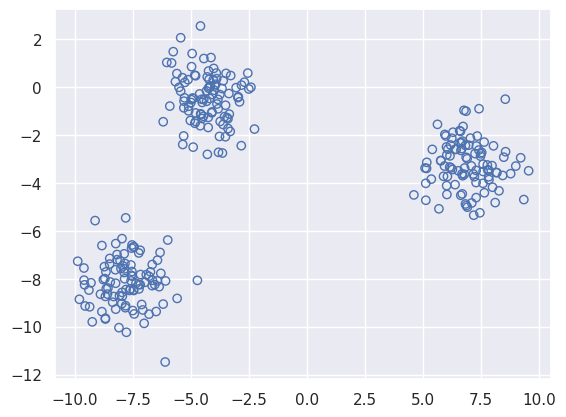

In [15]:
plt.scatter(X[:,0],X[:,1],color='b',facecolors='none')

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
grupos = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-17-cb34f0fac9f7>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('magma', np.max(grupos) + 1)


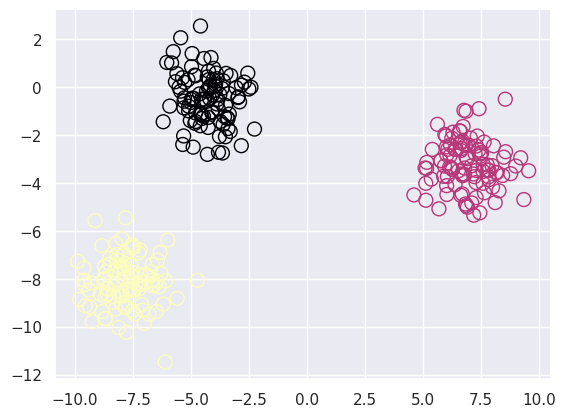

In [17]:
# Crear un colormap para la propiedad 'c'
colormap = plt.cm.get_cmap('magma', np.max(grupos) + 1)

# Graficar puntos con bordes coloreados por el grupo y con relleno transparente
# Generamos un array de colores con el mismo tamaño que grupos y llenamos el canal alfa
colors = colormap(grupos)
# Configuramos la transparencia total para el relleno
facecolors = np.zeros_like(colors)
facecolors[:, 3] = 0  # alfa a 0 para el relleno

plt.scatter(X[:, 0], X[:, 1], edgecolors=colors, facecolors=facecolors, s=100, linewidths=1)

## Agrupamiento Jarárquico

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
X,y = make_blobs(n_samples=20,centers=2)
enlace_sencillo = linkage(X,'single')

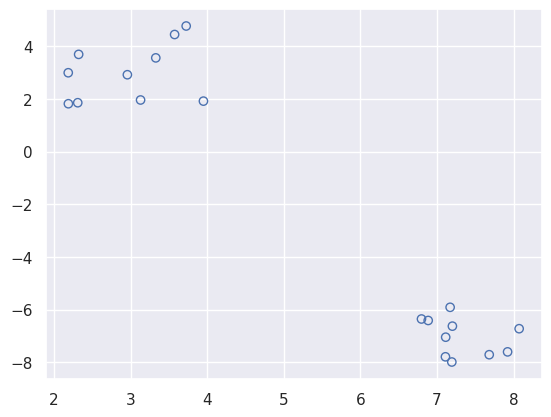

In [20]:
plt.scatter(X[:,0],X[:,1],color='b',facecolors='none')
plt.show()

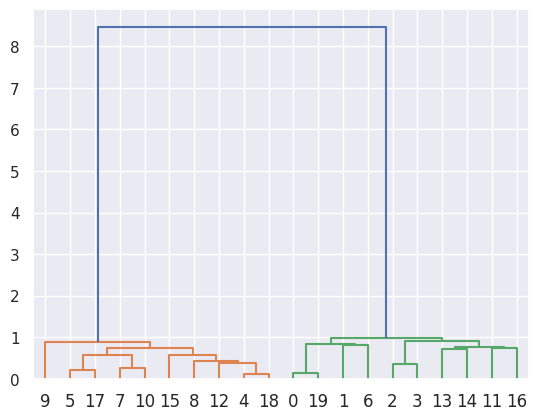

In [21]:
dendrogram(enlace_sencillo)
plt.show()

## Fuzzy C-means

In [30]:
%pip install fuzzy-c-means

In [31]:
from fcmeans import FCM

In [32]:
X,y = make_blobs(n_samples=100,centers=2)
fcm = FCM(n_clusters=3)
fcm.fit(X)
centros = fcm.centers
grupos = fcm.predict(X)

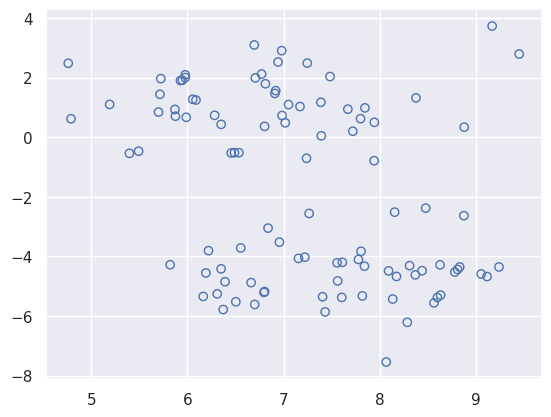

In [33]:
plt.scatter(X[:,0],X[:,1],color='b',facecolors='none')

<ipython-input-34-cb34f0fac9f7>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('magma', np.max(grupos) + 1)


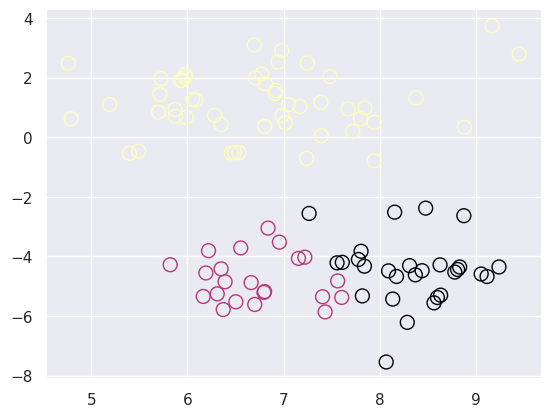

In [34]:

# Crear un colormap para la propiedad 'c'
colormap = plt.cm.get_cmap('magma', np.max(grupos) + 1)

# Graficar puntos con bordes coloreados por el grupo y con relleno transparente
# Generamos un array de colores con el mismo tamaño que grupos y llenamos el canal alfa
colors = colormap(grupos)
# Configuramos la transparencia total para el relleno
facecolors = np.zeros_like(colors)
facecolors[:, 3] = 0  # alfa a 0 para el relleno

plt.scatter(X[:, 0], X[:, 1], edgecolors=colors, facecolors=facecolors, s=100, linewidths=1)

#### ¿Qué es el coeficiente de silueta?

<p>El coeficiente de silueta $S(i)$ es una métrica de rendimiento que permite evaluar la calidad de los agrupamientos en un conjunto de datos. Esta métrica cuantifica qué tan bien están agrupados los puntos dentro de un cluster y qué tan bien están separados de los puntos pertenecientes a otros clusters:</p>

\begin{equation}
S(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))}
\end{equation}

<p>Donde \(a(i)\) representa la distancia media entre un punto determinado y todos los demás puntos dentro del mismo grupo, indicando así la cohesión del cluster. Por otro lado, \(b(i)\) es la distancia media más baja entre el punto \(i\) y todos los puntos de otros clusters, lo cual ofrece una medida de la separación.</p>


In [35]:
# Método de la silueta con KMeans
silhouette_scores = []
ks = range(2, 10)
for k in ks:  # Silhouette no se puede calcular con k = 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

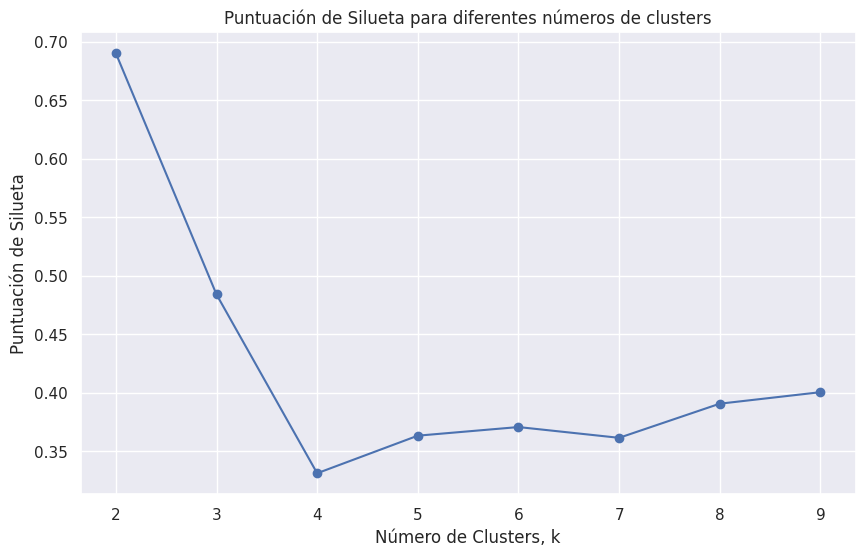

In [36]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters, k')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta para diferentes números de clusters')
plt.grid(True)
plt.show()

### Ejercicio

<p>Utilice el conjunto de datos de cryptojacking <code>dataset_MR_V5_ID_optimized</code> para aplicar los algoritmos de agrupación K-Means, Jerárquico y Fuzzy C-Means. Presente la lista de centroides y elabore gráficos de los agrupamientos, limitándose a dos grupos.</p>
<p>Identifique las características más relevantes utilizando árboles de decisión, tras aplicar umbrales de variabilidad.</p>
<p>Elabore un gráfico del coeficiente de silueta.</p>
<p>Recuerde eliminar la columna <code>Hora</code> y la columna <code>Label</code> reservarla para el entrenamiento con el  árbole de decisió, que, aunque no se usará para clasificar, la pide como argumento.</p>

In [ ]:
dataset = pd.read_csv('https://alhernandezsua.gitlab.io/amd-misti/datasets/dataset_MR_V5_ID.csv')

In [ ]:
y = dataset['Label']
X = dataset.drop(columns=["Hora","Label"])